<a href="https://colab.research.google.com/github/nigamdivyyanshi16/Exploratory-Data-Analysis-Python/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Installation of Libraries

Objective: The analysis primarily investigates factors influencing customer churn,
 particularly focusing on payment methods and contract types

In [86]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

Step 2: Importing Libraries

In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Step 3: Loading Data


In [88]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA DATASETS/Customer Churn.csv", encoding="unicode_escape")
df#display data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Step 4: Inspecting Data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. We can see that "Monthly charges" are in float data type whereas "Total charges" as object which clearly means that it contains Alphanumeric values, so , if we see data, column has blank values, so to replace blank with zero as their tenure is 0, that is, the customers have just started availing our services, so we will convert blanks to 0 and datatype to float as well for Data consistency.

In [90]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0).astype("float")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Step 5: Finding and Handling Missing values in the Dataset

In [92]:
df.isnull().sum()
#for overall
#df.isnull().sum().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Step 6: Statistical analysis of data

In [93]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Step 7: Check duplicates

In [94]:
df.duplicated().sum()
#no duplicates on entrie row basis

np.int64(0)

In [95]:
#for a given data, unique value is Customer ID, check duplicate for this column as this will/ and have to be unique
df["customerID"].duplicated().sum()
#no duplicated values

np.int64(0)

TO SIMPLIFY DATA

As for Senior citizen column is 0 and 1, convert data type value for that as well for easy and better understanding

In [96]:
def conv(value):
  if value==1:
    return "yes"
  else:
    return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [97]:
#to check data
df.tail()
#converted values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,no,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


Step 8:Analysis of Data

WHY COUNTPLOT?

1.seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
2.A count plot is used to visualize the frequency of categorical data. It shows how many times each category appears in a dataset.
3.Used when working with categorical data (e.g., gender, product category, city).
✅ Great for comparing counts across different categories.


<ipython-input-98-23449fdab68a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Churn',palette='Set2')


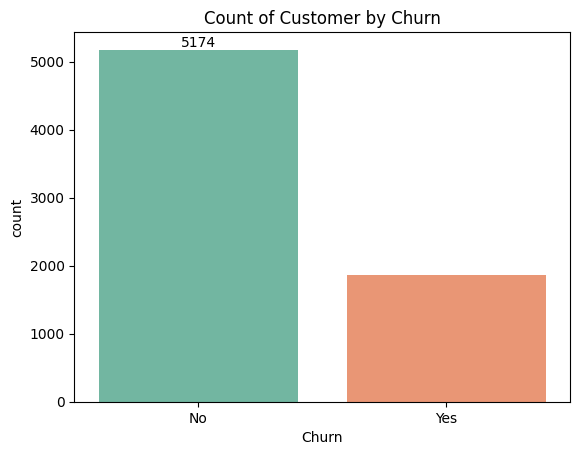

In [98]:
ax=sns.countplot(data=df,x='Churn',palette='Set2')
#to show to count of values, assign it to a variable
ax.bar_label(ax.containers[0])
#ax.containers → Stores the bars in a list.
#ax.containers[0] → Selects the first set of bars (usually, there's only one set in countplot()).
#bar_label(ax.containers[0]) → Adds count values on top of the bars.
plt.title("Count of Customer by Churn")
plt.show()
#with the help of matplotlib.pyplot we will display the data

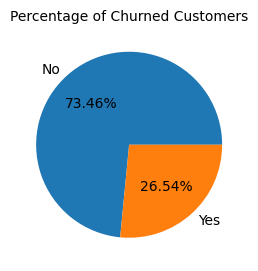

In [99]:
plt.figure(figsize=(3,4))# Set the figure size (width=3, height=4)
gb=df.groupby("Churn").agg({"Churn":"count"})
#Groups the dataset by the "Churn" column (e.g., "Yes" and "No").
#Counts how many times each category appears.
plt.pie(gb["Churn"], labels=gb.index,autopct="%1.2f%%")#% → Used for string formatting.%% → Used to display a literal % sign..
#gb["Churn"] → Provides the values [350, 150] (slice sizes).
#labels=gb.index → Labels the slices as "No" and "Yes".
#autopct="%1.2f%%" → Displays the percentage on each slice with 2 decimal places.
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

from the given pie chart we can conclude that 26.54% of our customers have churned out.

STEP 9: EXPLORE TO KNOW REASON FOR ABOVE ANALYSIS, SO MORE EDA

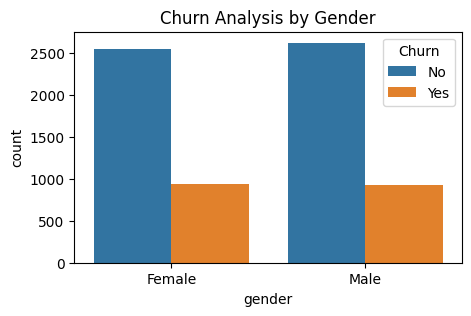

In [100]:
#ON BASIS OF GENDER
plt.figure(figsize=(5,3))
sns.countplot(data=df,x="gender", hue="Churn")
plt.title("Churn Analysis by Gender")
plt.show()

From Above, we can conclude that there is not much difference due to Gender, only a slighty Females have more churn count, but that too does not impact our analysis much.

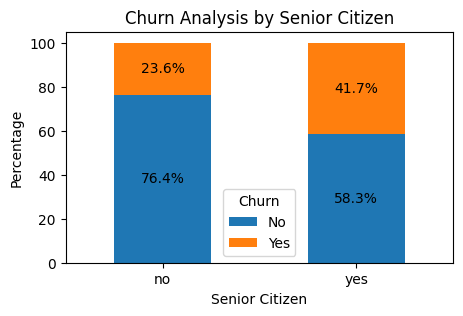

In [101]:
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
ax = crosstab.plot(kind='bar', stacked=True, figsize=(5, 3))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set titles and labels
plt.title('Churn Analysis by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.show()


Comparitively a greater percentage of people in senior category have churned out.

 Theanalysis reveals that senior citizens (aged 65+) have a churn rate of 41%,
 compared to a 26% churn rate among non-senior citizens.
 ○ Implication: Special retention programs and targeted customer service for senior
 customers may help reduce churn in this demographic

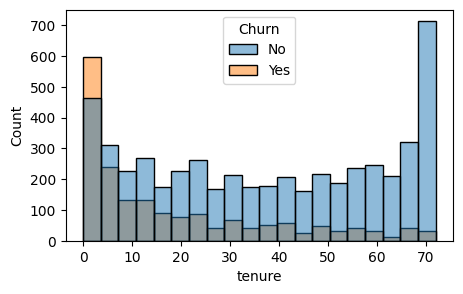

In [102]:
#on basis of tenure
plt.figure(figsize=(5,3))
sns.histplot(x="tenure",data=df,bins=20,hue='Churn')
plt.show()

People who have used our services for longer period have stayed whereas short tenure people have not stayed that is churned out.

 Customers with less than one year of tenure are the most likely to churn, with a
 50% churn rate. Those with 1-3 years of tenure show a decreasing churn trend
 at 35%, while customers who have been with the company for more than three
 years have a churn rate of just 15%.
 ○ Implication: Engaging customers early in their journey, especially within the first
 year, is critical for retention.

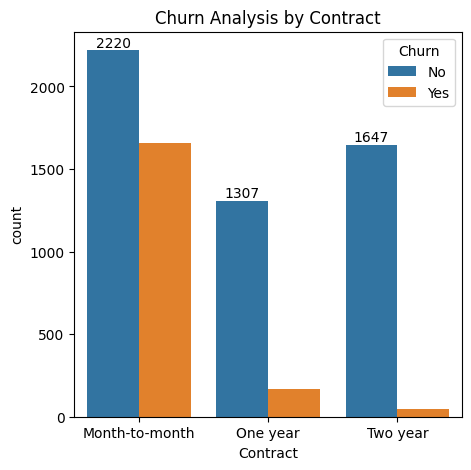

In [103]:
#on basis of contract
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Contract", hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn Analysis by Contract")
plt.show()

Observations: From above, we can see people with longer tenure plan that is of one year or two year have not churned much whereas people with month to month contract/tenure have churned out more.

Recommendations: We can provide them better, affordable and reliable yearly,annual plans, so that they can purchase that and stay longer with less churn rate

 Customers on month-to-month contracts exhibit the highest churn rate, with
 42% of such customers likely to churn.
 ○ Incontrast, customers on one-year and two-year contracts have churn rates of
 11% and 3%, respectively.
 ○ Implication: Longer contract periods serve as a strong retention tool, as
 customers with extended commitments are far less likely to leave

In [104]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace with your actual dataset)
data = {
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'MultipleLines': ['No', 'Yes', 'No', 'Yes', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'No'],
    'OnlineSecurity': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'OnlineBackup': ['No', 'Yes', 'No', 'Yes', 'No'],
    'DeviceProtection': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'TechSupport': ['No', 'Yes', 'No', 'Yes', 'No'],
    'StreamingTV': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingMovies': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes']  # Added Churn column
}
df = pd.DataFrame(data)

# Columns to visualize
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots
total_plots = len(columns_to_plot)
rows, cols = 3, 3  # 3x3 grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.tight_layout(pad=5.0)  # Adjust spacing

# Generate count plots
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.countplot(data=df, x=column, ax=ax, palette='viridis', hue='Churn')
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if necessary
for i in range(total_plots, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

The majority of customers who do not churn tend to have servces like PhoneService, InterneService(Particularly DSL) and Online Security enabed. For services like Online Backup, TechSupport and Streaming Tv churned rates are noticeably higher when these services are not used or are unavailable

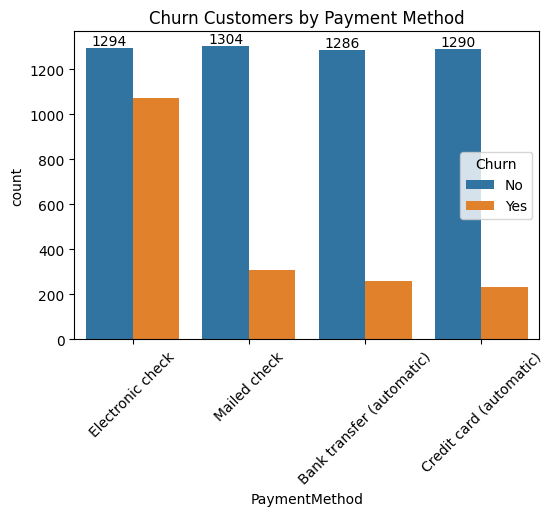

In [106]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn Customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

Customer is likely to churn more when they are using Electronic cheques.

Customers paying via electronic checks show the highest churn rate at 45%,
 while those using credit cards, bank transfers, or mailed checks have
 significantly lower churn rates, averaging around 15-18%.
 ○ Implication: The convenience, security, and trust issues related to electronic
 payments might be contributing factors. Encouraging customers to switch to
 more stable payment methods could reduce churn.

 Recommendations:
 ● PromoteLong-Term Contracts: Offer incentives for customers to commit to longer
 contracts to reduce churn.
 ● AddressPayment Method Concerns: Implement campaigns encouraging customers
 to switch from electronic checks to more reliable payment methods.
 ● CustomerEngagement in Early Tenure: Focus on improving the customer experience
 within the first year, as churn is highest in this period.
 ● Special Senior Citizen Retention Programs: Create personalized offers or assistance
 programs to retain the senior demographic